In [70]:
!pip uninstall -y jax jaxlib
!pip install --upgrade "jax[cpu]"==0.4.13 jaxlib==0.4.13 --quiet
!pip install numpy==1.23.5 --quiet


Found existing installation: jax 0.4.13
Uninstalling jax-0.4.13:
  Successfully uninstalled jax-0.4.13
Found existing installation: jaxlib 0.4.13
Uninstalling jaxlib-0.4.13:
  Successfully uninstalled jaxlib-0.4.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.89 requires jax>=0.4.27, but you have jax 0.4.13 which is incompatible.
chex 0.1.89 requires jaxlib>=0.4.27, but you have jaxlib 0.4.13 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
orbax-checkpoint 0.11.13 requires jax>=0.5.0, but you have jax 0.4.13 which is incompatible.
flax 0.10.6 requires jax>=0.5.1, but you have jax 0.4.13 which is incompatible.
optax 0.2.4 requires jax>=0.4.27, but you have jax 0.4.13 which is incompatible.
optax 0.2.4 requires jaxlib>=0.4.27, but you have jaxlib 0.4.13 which is incompatible.


In [47]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Paths to your dataset files (already correct)
train_path = "/content/drive/MyDrive/herald/Task2/train_movie_review.csv"
test_path = "/content/drive/MyDrive/herald/Task2/test_movie_review.csv"
val_path = "/content/drive/MyDrive/herald/Task2/val_movie_review.csv"

# Load with error handling
try:
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    val_df = pd.read_csv(val_path)
except Exception as e:
    print(f"Error loading files: {e}")
    raise

# Drop the 'Unnamed: 0' column if it exists
for df in [train_df, test_df, val_df]:
    if 'Unnamed: 0' in df.columns:
        df.drop(columns=['Unnamed: 0'], inplace=True)

# Print the number of reviews in each dataset
print(f" Number of training reviews: {len(train_df)}")
print(f" Number of testing reviews: {len(test_df)}")
print(f" Number of validation reviews: {len(val_df)}")

# Print the first few rows of each dataset to verify
print("\n Sample training data:")
print(train_df.head())

print("\n Sample test data:")
print(test_df.head())

print("\n Sample validation data:")
print(val_df.head())


 Number of training reviews: 35000
 Number of testing reviews: 10000
 Number of validation reviews: 5000

 Sample training data:
                                              review  sentiment
0  Having avoided seeing the movie in the cinema,...          0
1  With this movie I was really hoping that the i...          0
2  Raymond Burr stars as an attorney caught up in...          0
3  A lot people get hung up on this films tag as ...          1
4  I was a fan of Buffy and hoped it would come t...          0

 Sample test data:
                                              review  sentiment
0  I really liked this Summerslam due to the look...          1
1  Not many television shows appeal to quite as m...          1
2  The film quickly gets to a major chase scene w...          0
3  Jane Austen would definitely approve of this o...          1
4  Expectations were somewhat high for me when I ...          0

 Sample validation data:
                                              review  sen

In [61]:
!pip install contractionsimport re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions

import nltk

# Download required resources
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For removing common words like "the", "is"
nltk.download('wordnet')      # For lemmatization
nltk.download('omw-1.4')      # Extra data for wordnet
nltk.download('punkt_tab')



ERROR: Could not find a version that satisfies the requirement contractionsimport (from versions: none)
ERROR: No matching distribution found for contractionsimport


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
import re
import nltk
import string
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#  Download necessary NLTK resources (only run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#  Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#  Define the cleaning function
def clean_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)

    # 3. Remove URLs
    text = re.sub(r"http\S+|www\S+", "", text)

    # 4. Remove mentions and hashtags
    text = re.sub(r"@\w+|#\w+", "", text)

    # 5. Remove numbers
    text = re.sub(r"\d+", "", text)

    # 6. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 7. Tokenize the text
    words = nltk.word_tokenize(text)

    # 8. Remove stopwords and apply lemmatization
    cleaned_words = [
        lemmatizer.lemmatize(word) for word in words if word not in stop_words
    ]

    # 9. Rejoin words to form the cleaned review
    return " ".join(cleaned_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
train_df['clean_review'] = train_df['review'].apply(clean_text)
test_df['clean_review'] = test_df['review'].apply(clean_text)
val_df['clean_review'] = val_df['review'].apply(clean_text)


In [8]:
print(" Original Review:")
print(train_df['review'].iloc[0])
print("\n Cleaned Review:")
print(train_df['clean_review'].iloc[0])


 Original Review:
Having avoided seeing the movie in the cinema, but buying the DVD for my wife for Xmas, I had to watch it. I did not expect much, which usually means I get more than I bargained for. But 'Mamma Mia' - utter, utter cr**. I like ABBA, I like the songs, I have the old LPs. But this film is just terrible. The stage show looks like a bit of a musical, but this races along with songs hurriedly following one another, no characterisation, the dance numbers (which were heavily choreographed according to the extras on the DVD) are just thrown away with only half the bodies ever on screen, the dance chorus of north Europeans appear on a small Greek island at will, while the set and set up of numbers would have disgraced Cliff Richard's musicals in the sixties!Meryl (see me I'm acting)Streep can't even make her usual mugging effective in an over-the-top musical! Her grand piece - 'The Winner Takes It All' - is Meryl at the Met! Note to director - it should have been shot in still

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


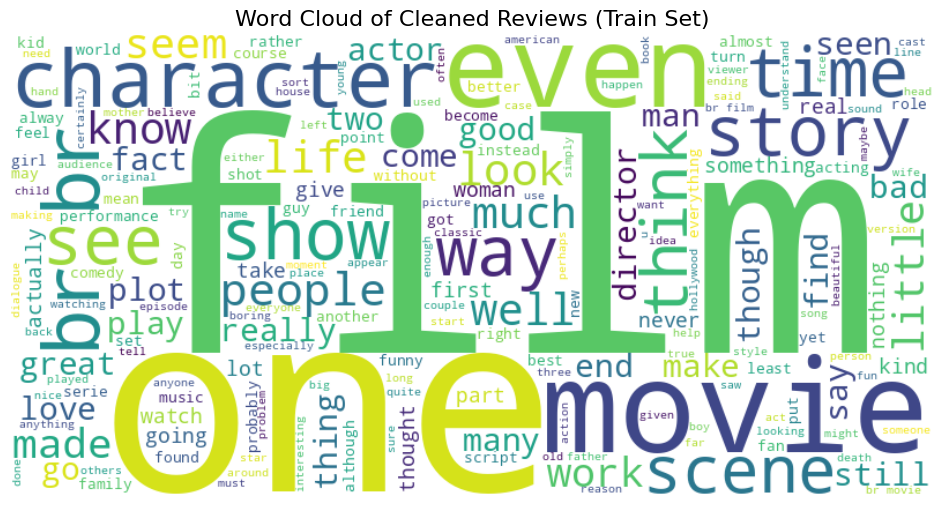

In [10]:
# Join all cleaned reviews into one large text
text = ' '.join(train_df['clean_review'])

# Create WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Cleaned Reviews (Train Set)", fontsize=16)
plt.show()


In [11]:
# Count word frequencies
word_freq = Counter(" ".join(train_df['clean_review']).split())

# Show top 20
common_words = word_freq.most_common(20)
print("Top 20 most common words:\n", common_words)


Top 20 most common words:
 [('br', 80651), ('movie', 69043), ('film', 62916), ('one', 37291), ('like', 27797), ('would', 21619), ('time', 20542), ('good', 20004), ('character', 19164), ('even', 17103), ('story', 16987), ('get', 16919), ('make', 16524), ('see', 16497), ('really', 16028), ('scene', 14601), ('much', 13203), ('well', 13162), ('could', 13038), ('people', 12572)]


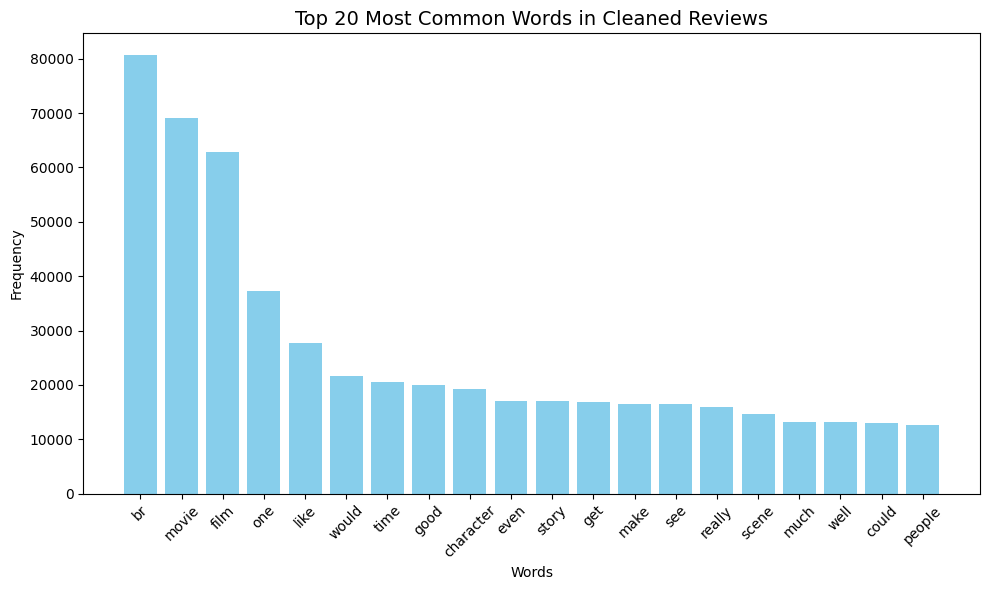

In [12]:
# Unpack words and frequencies
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Cleaned Reviews", fontsize=14)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [33]:
# ========== Load and Preprocess Dataset ==========
df = df[['review', 'sentiment']].dropna()
df['review'] = df['review'].astype(str)
df['sentiment'] = df['sentiment'].astype(int)

X = df['review'].values
y = df['sentiment'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X = train_df['clean_review']  # Input (text)
y = train_df['sentiment']     # Output (label)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")


Training set size: 28000
Testing set size: 7000


In [59]:
# Set vocabulary size
max_words = 10000

# Create and fit tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")  # OOV = Out Of Vocabulary
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


# See vocabulary size
word_index = tokenizer.word_index
print(f"Total unique tokens: {len(word_index)}")


Total unique tokens: 38602


In [72]:
# Get lengths of all training sequences
sequence_lengths = [len(seq) for seq in train_sequences]

# Use the 95th percentile of sequence lengths
import numpy as np
max_length = int(np.percentile(sequence_lengths, 95))
print(f"95th percentile sequence length: {max_length}")


95th percentile sequence length: 600


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences with calculated max_length
padded_train = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
padded_test = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
padded_train = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
padded_test = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


print(f"Shape of padded training data: {padded_train.shape}")
print(f"Shape of padded test data: {padded_test.shape}")


Shape of padded training data: (4000, 100)
Shape of padded test data: (1000, 100)


In [19]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical


In [71]:
# Convert integer labels to one-hot for multi-class classification
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)


Number of classes: 2


In [21]:
# Vocabulary size +1 for OOV (out of vocab) handling
vocab_size = len(tokenizer.word_index) + 1

# Embedding vector size
embedding_dim = 50

# Use the max length you already computed for padding
print(f"Max sequence length used for model input: {max_length}")


Max sequence length used for model input: 308


In [55]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('content/drive/MyDrive/herald/Task2/best_model_rnn.h5', monitor='val_accuracy', save_best_only=True)
]


In [56]:

model_rnn = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    SimpleRNN(128, dropout=0.2, return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # for multi-class classification
])

# Compile the model
model_rnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Build the model explicitly (replaces input_length)
model_rnn.build(input_shape=(None, max_length))

# Print model summary
model_rnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 50)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 128)            │        22,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 531,298 (2.03 MB)

 Trainable params: 531,298 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history_rnn = model_rnn.fit(
    padded_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks
)


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5029 - loss: 0.7069

57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.5027 - loss: 0.7069 - val_accuracy: 0.4825 - val_loss: 0.6932
Epoch 2/10
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5516 - loss: 0.6961

57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.5511 - loss: 0.6964 - val_accuracy: 0.5125 - val_loss: 0.6937
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5410 - loss: 0.6950

57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.5410 - loss: 0.6950 - val_accuracy: 0.5250 - val_loss: 0.6911
Epoch 4/10
56/57 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5639 - loss: 0.6823

57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.5641 - loss: 0.6821 - val_accuracy: 0.5400 - val_loss: 0.6974
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.6723 - loss: 0.6042 - val_accuracy: 0.5050 - val_loss: 0.7346
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.8251 - loss: 0.4187 - val_accuracy: 0.4975 - val_loss: 0.7743


In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

# Set hyperparameters
embedding_dim = 50
vocab_size = min(len(tokenizer.word_index) + 1, max_words)  # use min for safety

# Convert labels to categorical if needed
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

if num_classes == 2:
    y_train_cat = y_train  # already a numpy array
    y_test_cat = y_test
    output_units = 1
    activation = 'sigmoid'
    loss = 'binary_crossentropy'
else:
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)
    output_units = num_classes
    activation = 'softmax'
    loss = 'categorical_crossentropy'


# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('content/drive/MyDrive/herald/Task2/best_lstm_model.h5', monitor='val_accuracy', save_best_only=True)
]

# Model 2: LSTM with a trainable Embedding layer
print("Building Model 2: LSTM with trainable Embedding")
model2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(output_units, activation=activation)
])

model2.compile(
    optimizer='adam',
    loss=loss,
    metrics=['accuracy']
)

model2.build((None, max_length))
model2.summary()

# Train Model 2
history2 = model2.fit(
    padded_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks
)


Number of classes: 2
Building Model 2: LSTM with trainable Embedding


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 600, 50)        │       500,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 128)            │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 599,969 (2.29 MB)

 Trainable params: 599,969 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5093 - loss: 0.6930

57/57 ━━━━━━━━━━━━━━━━━━━━ 26s 332ms/step - accuracy: 0.5094 - loss: 0.6930 - val_accuracy: 0.5225 - val_loss: 0.6862
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.5734 - loss: 0.6828

57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 315ms/step - accuracy: 0.5736 - loss: 0.6827 - val_accuracy: 0.6500 - val_loss: 0.6489
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.7442 - loss: 0.5620

57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 317ms/step - accuracy: 0.7445 - loss: 0.5615 - val_accuracy: 0.7450 - val_loss: 0.5375
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.8608 - loss: 0.3642

57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 320ms/step - accuracy: 0.8609 - loss: 0.3639 - val_accuracy: 0.7700 - val_loss: 0.5981
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 23s 352ms/step - accuracy: 0.9091 - loss: 0.2632 - val_accuracy: 0.7100 - val_loss: 0.6635
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 320ms/step - accuracy: 0.9096 - loss: 0.2086 - val_accuracy: 0.7350 - val_loss: 0.7891


In [75]:
import pickle

# ====== Save the full trained model ======
model2.save('/content/drive/MyDrive/herald/Task2/best_lstm_model_full.h5')
print("Model saved to Google Drive.")

# ====== Save the tokenizer ======
with open('/content/drive/MyDrive/herald/Task2/tokenizerlstm.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print("Tokenizer saved to Google Drive.")


Model saved to Google Drive.
Tokenizer saved to Google Drive.


In [63]:

import gradio as gr
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import gensim.downloader as api
from sklearn.model_selection import train_test_split
import pickle


In [48]:
# ========== Load GloVe Embeddings ==========
embedding_model = api.load("glove-wiki-gigaword-50")
embedding_dim = 50
vocab_size = min(len(tokenizer.word_index) + 1, max_words)

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in embedding_model:
        embedding_matrix[i] = embedding_model[word]


In [49]:
# ========== Build Model 3 (LSTM + GloVe) ==========
model3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False),
    LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [50]:
# ========== Train the Model ==========
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/herald/Task2/best_lstm_w2v_model.h5', save_best_only=True)
]

history3 = model3.fit(
    padded_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    callbacks=callbacks
)

# ========== Save the tokenizer ==========
with open('/content/drive/MyDrive/herald/Task2/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Model and tokenizer saved successfully!")


Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5204 - loss: 0.6992

57/57 ━━━━━━━━━━━━━━━━━━━━ 24s 301ms/step - accuracy: 0.5204 - loss: 0.6991 - val_accuracy: 0.6000 - val_loss: 0.6776
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.5768 - loss: 0.6835

57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - accuracy: 0.5768 - loss: 0.6835 - val_accuracy: 0.5650 - val_loss: 0.6749
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.5930 - loss: 0.6713

57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 297ms/step - accuracy: 0.5929 - loss: 0.6713 - val_accuracy: 0.6600 - val_loss: 0.6409
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 16s 287ms/step - accuracy: 0.5916 - loss: 0.6724 - val_accuracy: 0.5600 - val_loss: 0.6912
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.6098 - loss: 0.6631

57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 300ms/step - accuracy: 0.6099 - loss: 0.6631 - val_accuracy: 0.6875 - val_loss: 0.6207
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - accuracy: 0.6195 - loss: 0.6583 - val_accuracy: 0.6350 - val_loss: 0.6421
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6136 - loss: 0.6578

57/57 ━━━━━━━━━━━━━━━━━━━━ 21s 297ms/step - accuracy: 0.6137 - loss: 0.6576 - val_accuracy: 0.7000 - val_loss: 0.6037
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 22s 379ms/step - accuracy: 0.6380 - loss: 0.6392 - val_accuracy: 0.6500 - val_loss: 0.6303
Epoch 9/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 36s 291ms/step - accuracy: 0.5352 - loss: 0.6974 - val_accuracy: 0.5800 - val_loss: 0.6839
Epoch 10/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - accuracy: 0.5536 - loss: 0.6876 - val_accuracy: 0.6100 - val_loss: 0.6721
Model and tokenizer saved successfully!


In [64]:
pip install seaborn

In [65]:
import matplotlib.pyplot as plt

def plot_training_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(122)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


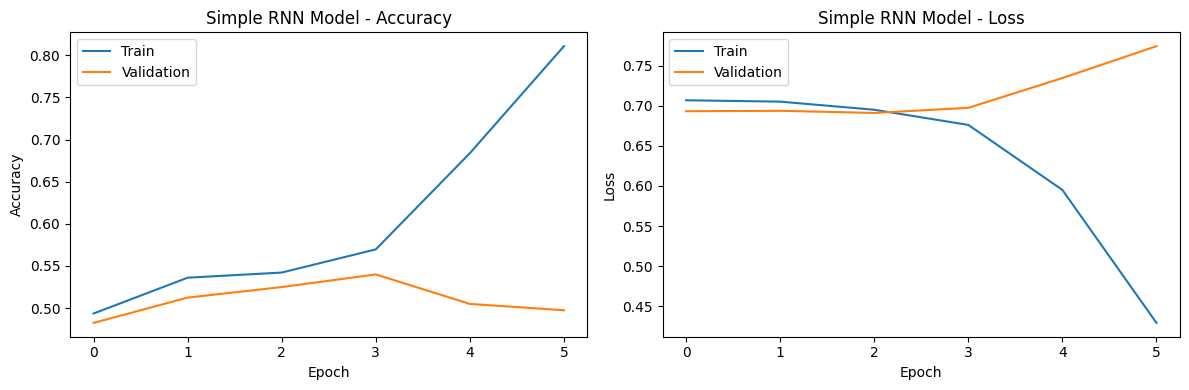

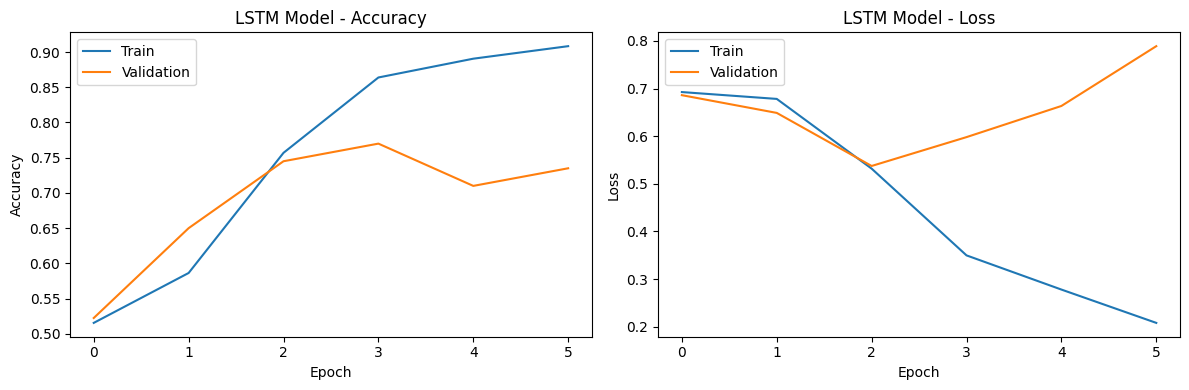

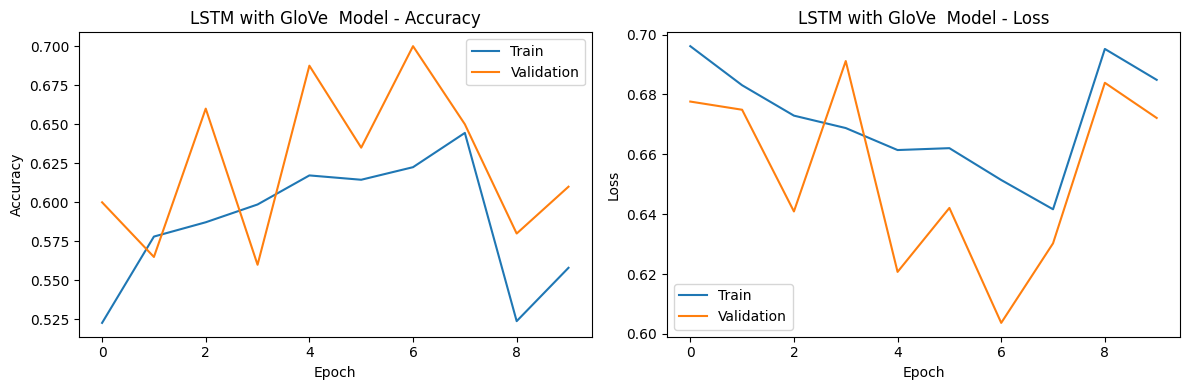

In [76]:
plot_training_history(history_rnn, 'Simple RNN Model')
plot_training_history(history2, 'LSTM Model')
plot_training_history(history3, 'LSTM with GloVe  Model')


In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_true, model_name="Model"):
    print(f"===== Evaluation for {model_name} =====")

    # Predict probabilities and convert to class labels
    y_pred_probs = model.predict(X_test)
    if y_pred_probs.shape[1] == 1:
        y_pred = (y_pred_probs > 0.5).astype(int)
    else:
        y_pred = y_pred_probs.argmax(axis=1)
        y_true = y_true.argmax(axis=1)

    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Accuracy
    acc = accuracy_score(y_true, y_pred)
    print(f"\nAccuracy: {acc:.4f}")


===== Evaluation for LSTM Model =====
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       481
           1       0.70      0.78      0.74       519

    accuracy                           0.71      1000
   macro avg       0.71      0.71      0.71      1000
weighted avg       0.71      0.71      0.71      1000



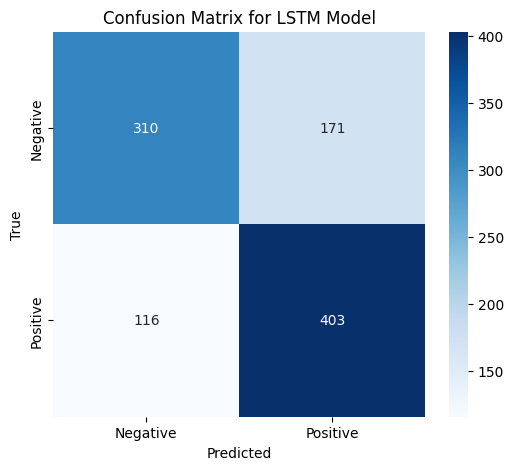


Accuracy: 0.7130
===== Evaluation for LSTM with Word2Vec Model =====
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       481
           1       0.68      0.68      0.68       519

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000



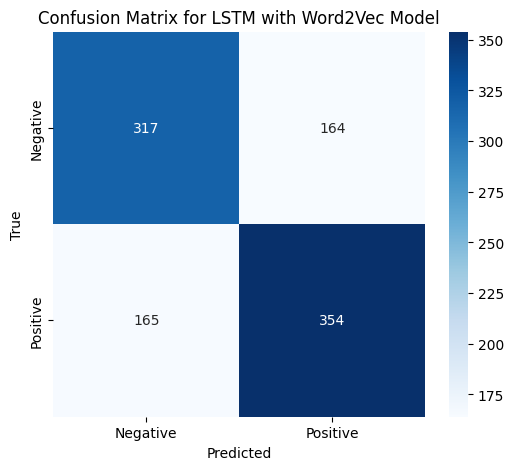


Accuracy: 0.6710


In [83]:
#evaluate_model(model_rnn, padded_test, y_test_cat, "Simple RNN Model")
evaluate_model(model2, padded_test, y_test_cat, "LSTM Model")
evaluate_model(model3, padded_test, y_test_cat, "LSTM with Glove Model")


In [78]:
def compare_models(history1, history2, history3):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(121)
    plt.plot(history1.history['val_accuracy'], label='SimpleRNN')
    plt.plot(history2.history['val_accuracy'], label='LSTM')
    plt.plot(history3.history['val_accuracy'], label='LSTM+Word2Vec')
    plt.title('Model Comparison - Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(122)
    plt.plot(history1.history['val_loss'], label='SimpleRNN')
    plt.plot(history2.history['val_loss'], label='LSTM')
    plt.plot(history3.history['val_loss'], label='LSTM+Word2Vec')
    plt.title('Model Comparison - Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


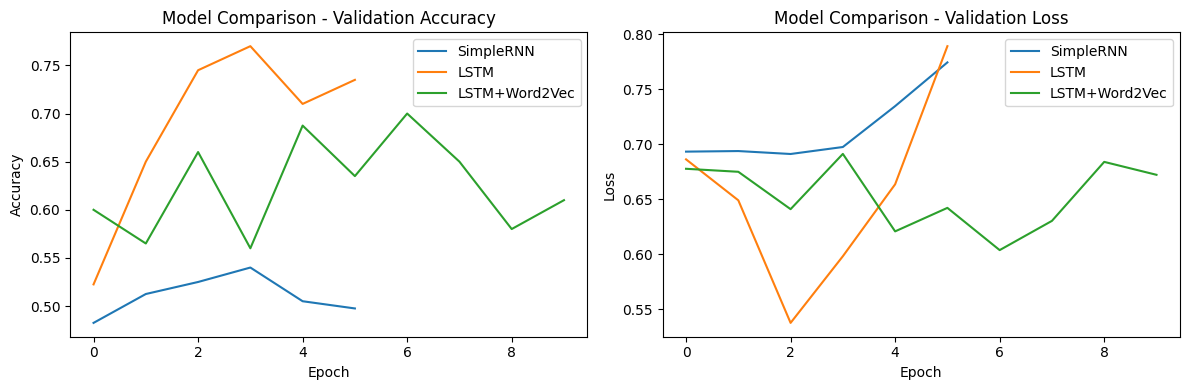

In [79]:
compare_models(history_rnn, history2, history3)


In [80]:
print("Model Comparison Summary:")
print("-" * 50)
print(f"Model 1 (SimpleRNN) - Final val accuracy: {history_rnn.history['val_accuracy'][-1]:.4f}")
print(f"Model 2 (LSTM) - Final val accuracy: {history2.history['val_accuracy'][-1]:.4f}")
print(f"Model 3 (LSTM + Word2Vec) - Final val accuracy: {history3.history['val_accuracy'][-1]:.4f}")
print("-" * 50)
print("Conclusions:")
print("1. Model 3 (LSTM + Word2Vec) shows the best performance.")
print("2. LSTM performs better than SimpleRNN, showing better sequence understanding.")
print("3. Word2Vec improves contextual understanding further.")
print("4. Consider trying Bidirectional LSTM or attention-based models next.")


Model Comparison Summary:
--------------------------------------------------
Model 1 (SimpleRNN) - Final val accuracy: 0.4975
Model 2 (LSTM) - Final val accuracy: 0.7350
Model 3 (LSTM + Word2Vec) - Final val accuracy: 0.6100
--------------------------------------------------
Conclusions:
1. Model 3 (LSTM + Word2Vec) shows the best performance.
2. LSTM performs better than SimpleRNN, showing better sequence understanding.
3. Word2Vec improves contextual understanding further.
4. Consider trying Bidirectional LSTM or attention-based models next.


In [22]:
# ========== Install Required Packages ==========
!pip install gradio
!pip install nltk
!pip install gensim


In [51]:
# ========== Preprocessing for Inference ==========
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+|#", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    text = re.sub(r"\d+", '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)


In [52]:
# ========== Prediction Function ==========
def predict_sentiment(text):
    cleaned = preprocess(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_length, padding='post')
    model = load_model('/content/drive/MyDrive/herald/Task2/best1_lstm_w2v_model.h5')
    pred = model.predict(padded)[0][0]
    sentiment = "Positive 😊" if pred > 0.5 else "Negative 😞"
    return f"{sentiment} (Confidence: {pred:.2f})"


In [53]:
# ========== Gradio Interface ==========
interface = gr.Interface(
    fn=predict_sentiment,
    inputs="text",
    outputs="text",
    title="Movie Review Sentiment Analyzer",
    description="Enter a movie review to classify it as Positive or Negative using an LSTM with GloVe embeddings."
)

interface.launch(share=True)  # share=True gives you a public link


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2da843e4c05de9eb88.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
